# Data Collection

In [1]:
import os
os.chdir('D:/')

In [2]:
import pandas as pd

In [3]:
df=pd.read_csv('Restaurant_Reviews.csv')
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [4]:
df.tail()

,Review,Liked
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0
999,"Then, as if I hadn't wasted enough of my life ...",0


# Preprocessing

In [5]:
import re

In [6]:
pre=[]
for i in df['Review']:
    s=i.lower()
    s1=re.sub('[^a-z]','',s)
    pre.append(s1)

In [7]:
pre[0:3]

['wowlovedthisplace', 'crustisnotgood', 'nottastyandthetexturewasjustnasty']

In [8]:
df['Review1']=pre
df

,Review,Liked,Review1
0,Wow... Loved this place.,1,wowlovedthisplace
1,Crust is not good.,0,crustisnotgood
2,Not tasty and the texture was just nasty.,0,nottastyandthetexturewasjustnasty
3,Stopped by during the late May bank holiday of...,1,stoppedbyduringthelatemaybankholidayoffrickste...
4,The selection on the menu was great and so wer...,1,theselectiononthemenuwasgreatandsoweretheprices
...,...,...,...
995,I think food should have flavor and texture an...,0,ithinkfoodshouldhaveflavorandtextureandbothwer...
996,Appetite instantly gone.,0,appetiteinstantlygone
997,Overall I was not impressed and would not go b...,0,overalliwasnotimpressedandwouldnotgoback
998,"The whole experience was underwhelming, and I ...",0,thewholeexperiencewasunderwhelmingandithinkwel...


# Define x and Y

In [9]:
x=df['Review1']
y=df['Liked']

In [10]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

In [11]:
x

0                                      wowlovedthisplace
1                                         crustisnotgood
2                      nottastyandthetexturewasjustnasty
3      stoppedbyduringthelatemaybankholidayoffrickste...
4        theselectiononthemenuwasgreatandsoweretheprices
                             ...                        
995    ithinkfoodshouldhaveflavorandtextureandbothwer...
996                                appetiteinstantlygone
997             overalliwasnotimpressedandwouldnotgoback
998    thewholeexperiencewasunderwhelmingandithinkwel...
999    thenasifihadntwastedenoughofmylifetheretheypou...
Name: Review1, Length: 1000, dtype: object

# Vectorization

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [13]:
tf=TfidfVectorizer()
cv=CountVectorizer()

In [14]:
x1=tf.fit_transform(x).toarray()
x1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
x2=cv.fit_transform(x).toarray()
x2

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

# Split the data

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x1,y,test_size=0.2,random_state=21)

# Model Buliding

In [17]:
from keras.models import Sequential
from keras.layers import Dense,BatchNormalization,Dropout

In [18]:
nn=Sequential()

In [19]:
nn.add(Dense(1000,input_dim=x_train.shape[1],activation ='relu'))
nn.add(BatchNormalization())

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1000,activation='relu'))
nn.add(BatchNormalization())
nn.add(Dropout(0.2))

nn.add(Dense(1,activation='sigmoid'))


# Compile the model

In [46]:
nn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

# Callbacks

In [47]:
from keras.callbacks import EarlyStopping
Early=EarlyStopping(monitor='Val_loss',patience=5)

# Fitting Model

In [48]:
hist=nn.fit(x_train,y_train,validation_split=0.2,callbacks=[Early],epochs=50)

Epoch 1/50


20/20 [==============================] - 5s 72ms/step - loss: 1.3911 - accuracy: 0.5328 - val_loss: 0.6927 - val_accuracy: 0.5500
Epoch 2/50
20/20 [==============================] - 1s 48ms/step - loss: 0.3404 - accuracy: 0.9031 - val_loss: 0.6893 - val_accuracy: 0.5312
Epoch 3/50
20/20 [==============================] - 1s 46ms/step - loss: 0.0817 - accuracy: 0.9688 - val_loss: 0.6869 - val_accuracy: 0.5500
Epoch 4/50
20/20 [==============================] - 1s 45ms/step - loss: 0.0541 - accuracy: 0.9875 - val_loss: 0.6870 - val_accuracy: 0.5188
Epoch 5/50
20/20 [==============================] - 1s 40ms/step - loss: 0.0494 - accuracy: 0.9797 - val_loss: 0.7027 - val_accuracy: 0.4875
Epoch 6/50
20/20 [==============================] - 1s 41ms/step - loss: 0.0195 - accuracy: 0.9937 - val_loss: 0.7400 - val_accuracy: 0.4437
Epoch 7/50
20/20 [==============================] - 1s 44ms/step - loss: 0.0182 - accuracy: 0.9984 - val_loss: 0.7696 - val_accuracy: 0.4437
Epoch 8/50


# Plot the Result

In [49]:
import matplotlib.pyplot as plt

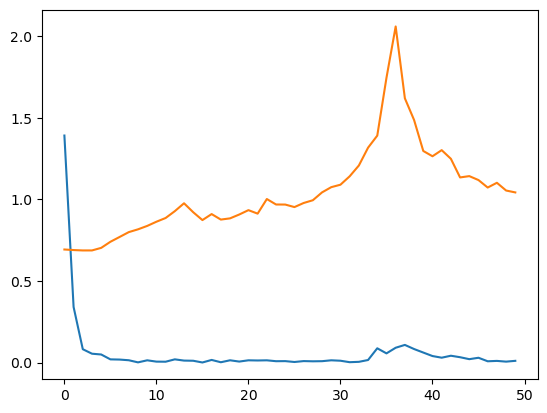

In [50]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

# Prediction

In [51]:
y_pred1= nn.predict(x_test)
y_pred1

7/7 [==============================] - 0s 13ms/step


array([[5.23893476e-01],
       [3.44931558e-02],
       [3.70211989e-01],
       [7.38479733e-01],
       [1.41788758e-02],
       [6.81504130e-01],
       [1.00081548e-01],
       [1.65742159e-01],
       [6.01447582e-01],
       [1.20811407e-02],
       [9.19040203e-01],
       [7.75549948e-01],
       [1.22739859e-01],
       [1.72974050e-01],
       [4.70324814e-01],
       [5.06098010e-03],
       [8.08020830e-01],
       [1.98527575e-01],
       [3.35903645e-01],
       [1.50354296e-01],
       [4.82110500e-01],
       [6.82105660e-01],
       [4.09152895e-01],
       [7.64934480e-01],
       [5.98463953e-01],
       [8.88149440e-01],
       [2.56598853e-02],
       [9.94751751e-02],
       [2.83171535e-01],
       [6.23605132e-01],
       [1.06457695e-02],
       [9.26325321e-01],
       [8.89175355e-01],
       [6.57245755e-01],
       [2.42454171e-01],
       [8.74609202e-02],
       [9.85220492e-01],
       [3.56562734e-01],
       [9.49715137e-01],
       [8.83866727e-01],


In [55]:
y_pred=[]

for i in y_pred1:
    if i>0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [57]:
y_pred

[1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0]

In [58]:
y_test

492    0
383    0
856    1
834    1
603    1
      ..
72     0
400    0
813    0
195    1
45     1
Name: Liked, Length: 200, dtype: int64

# Evalution of testing data

In [59]:
from sklearn.metrics import accuracy_score,classification_report,ConfusionMatrixDisplay

In [60]:
acc=accuracy_score(y_pred,y_test)
clf=classification_report(y_pred,y_test)
print('Accuracy:',acc)
print('Classification Report:\n',clf)

Accuracy: 0.495
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.50      0.55       121
           1       0.39      0.48      0.43        79

    accuracy                           0.49       200
   macro avg       0.49      0.49      0.49       200
weighted avg       0.51      0.49      0.50       200



# Unseen Data

In [62]:
text=input('Enter the Review: ')
s=text.lower()
s1=re.sub('[^a-z]',' ',s)

s2=tf.transform([s1]).toarray()

prob=nn.predict(s2)
print('Given Probability:',prob)

if prob>0.5:
    print('This is Positive Review')
else:
    print('This is Negative Review')

Enter the Review: bad taste
1/1 [==============================] - 0s 47ms/step
Given Probability: [[0.4070634]]
This is Negative Review
